In [1]:
%matplotlib inline
import pandas as pd

In [2]:
from IPython.core.display import HTML
#css = open('style-table.css').read() + open('style-notebook.css').read()
css = open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
titles = pd.read_csv('data/titles.csv', index_col=None)
titles.head()

,title,year
0,Orlando Vargas,2005
1,Niu-Peng,1989
2,Anandabhadram,2005
3,Mahendra Varma,1993
4,Beomdiga shidae,1970


In [4]:
cast = pd.read_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22.0
1,Gangsta Rap: The Glockumentary,2007,Too $hort,actor,Himself,NaN
2,Menace II Society,1993,Too $hort,actor,Lew-Loc,27.0
3,Porndogs: The Adventures of Sadie,2009,Too $hort,actor,Bosco,3.0
4,Stop Pepper Palmer,2014,Too $hort,actor,Himself,NaN


In [5]:
# build decade column for each Df
titles['decade'] = titles.year //10 * 10
cast['decade'] = cast.year //10 * 10

---

In [8]:
c = cast[(cast.character == 'Kermit the Frog') | 
         (cast.character == 'Oscar the Grouch') ]
c.head()

,title,year,name,type,character,n,decade
873261,An American Werewolf in London,1981,Jim Henson,actor,Kermit the Frog,18.0,1980
873263,Sesame Street Presents: Follow that Bird,1985,Jim Henson,actor,Kermit the Frog,2.0,1980
873267,The Great Muppet Caper,1981,Jim Henson,actor,Kermit the Frog,1.0,1980
873275,The Muppet Movie,1979,Jim Henson,actor,Kermit the Frog,1.0,1970
873282,The Muppets Take Manhattan,1984,Jim Henson,actor,Kermit the Frog,1.0,1980


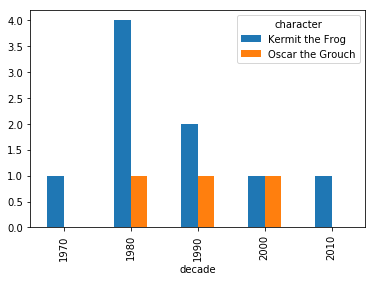

In [13]:
c.groupby(['decade', 'character']).size().unstack().plot(kind='bar')

### Define a year as a "Superman year" whose films feature more Superman characters than Batman. How many years in film history have been Superman years?

In [8]:
bs =  cast[(cast.character == 'Superman') | (cast.character == 'Batman')]
bs.head()

,title,year,name,type,character,n,decade
913,Batman Fights Dracula,1967,Jing Abalos,actor,Batman,1.0,1960
14596,Batman v Superman: Dawn of Justice,2016,Ben Affleck,actor,Batman,NaN,2010
14622,Justice League Part Two,2019,Ben Affleck,actor,Batman,NaN,2010
14638,Suicide Squad,2016,Ben Affleck,actor,Batman,NaN,2010
14644,The Justice League Part One,2017,Ben Affleck,actor,Batman,NaN,2010


In [12]:
sm = bs.groupby(['year', 'character']).size().unstack().fillna(0)
sm.head()

character,Batman,Superman
year,,
1938,1.0,0.0
1940,1.0,0.0
1943,1.0,0.0
1948,0.0,1.0
1949,2.0,0.0


In [14]:
(sm.Superman > sm.Batman).sum()

12

### How many years have been "Batman years", with more Batman characters than Superman characters?

In [15]:
(sm.Superman < sm.Batman).sum()

24

### Plot the number of actor roles each year and the number of actress roles each year over the history of film.

In [22]:
genderByYear = cast.groupby(['year', 'type']).size().unstack().fillna(0)

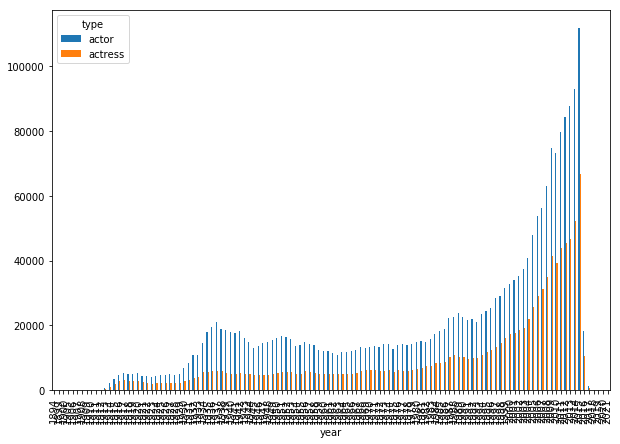

In [19]:
genderByYear.plot(kind='bar', figsize=(10,7))

### Plot the number of actor roles each year and the number of actress roles each year, but this time as a kind='area' plot.

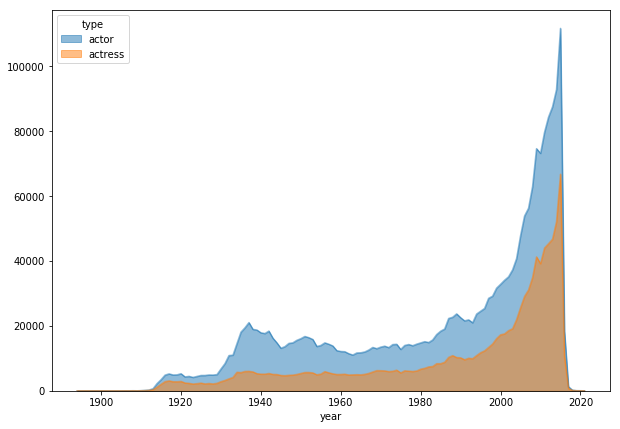

In [43]:
genderByYear.plot.area(stacked=False, figsize=(10,7))

### Plot the difference between the number of actor roles each year and the number of actress roles each year over the history of film.

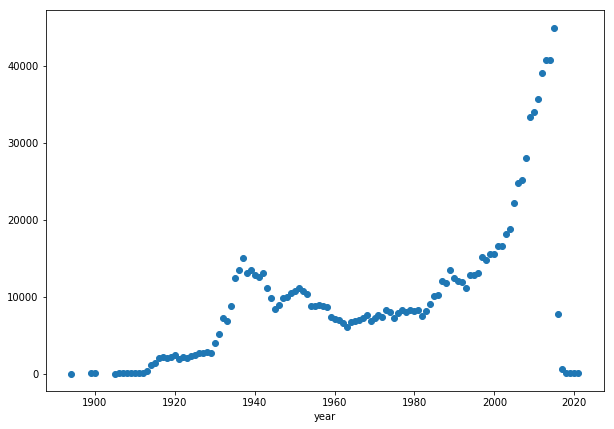

In [27]:
(genderByYear.actor - genderByYear.actress).plot(style='o', figsize=(10,7))

### Plot the fraction of roles that have been 'actor' roles each year in the history of film.

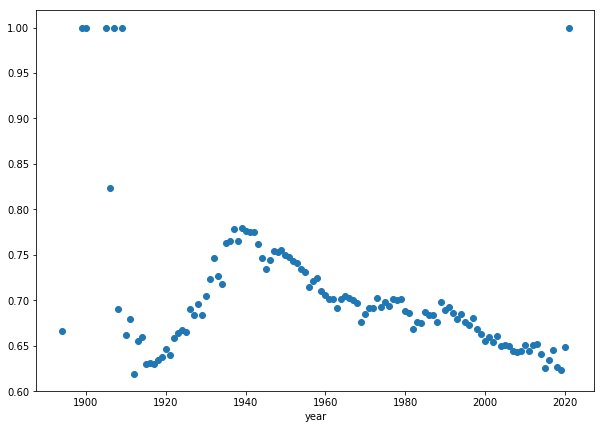

In [30]:
(genderByYear.actor / genderByYear.sum(axis=1)).plot(style='o', figsize=(10,7))

### Plot the fraction of supporting (n=2) roles that have been 'actor' roles each year in the history of film.

In [36]:
n2 = cast[cast.n == 2]
gn2 = n2.groupby(['year', 'type']).size().unstack().fillna(0)

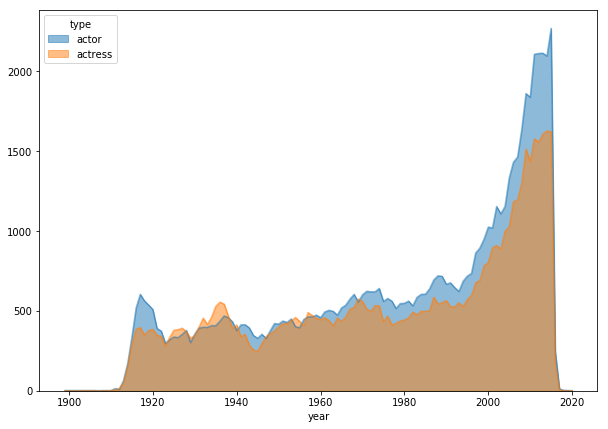

In [39]:
gn2.plot.area(stacked=False, figsize=(10,7))

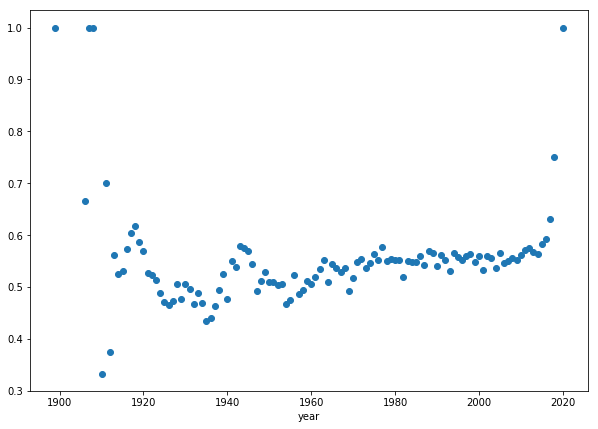

In [41]:
(gn2.actor / gn2.sum(axis=1)).plot(style='o', figsize=(10,7))

### Build a plot with a line for each rank n=1 through n=3, where the line shows what fraction of that rank's roles were 'actor' roles for each year in the history of film.

In [39]:
# pick just Ns 1-3
n13 = cast[cast.n < 4]
n13.head()

,title,year,name,type,character,n,decade
3,Porndogs: The Adventures of Sadie,2009,Too $hort,actor,Bosco,3.0,2000
82,Big Apple,2002,Angel 11:11,actor,Angel,2.0,2000
87,Live Freaky Die Freaky,2006,Nick 13,actor,TV Reporter #1,1.0,2000
97,Big Money Rustlas,2010,Shaggy 2 Dope,actor,Sheriff Sugar Wolf,2.0,2010
109,Asad wa arbaa qutat,2007,4 Cats,actor,Themselves,2.0,2000


In [40]:
# groupby year, N, type ; show male/female ratios for each n
n13byY =  n13.groupby(['year', 'n', 'type']).size().unstack().fillna(0)
n13byY.head()

type      actor  actress
year n                  
1899 1.0    2.0      0.0
     2.0    2.0      0.0
1906 1.0    2.0      1.0
     2.0    2.0      1.0
     3.0    0.0      1.0

In [41]:
# divide by row sums to get gender ratios for each role type
pcts = n13byY.div(n13byY.sum(axis=1), axis=0)
pcts.head()

type         actor   actress
year n                      
1899 1.0  1.000000  0.000000
     2.0  1.000000  0.000000
1906 1.0  0.666667  0.333333
     2.0  0.666667  0.333333
     3.0  0.000000  1.000000

In [47]:
# introduce role type to columns by unstacking
pctsbyN = pcts.unstack().fillna(0)
pctsbyN.head()

type     actor                  actress               
n          1.0       2.0  3.0       1.0       2.0  3.0
year                                                  
1899  1.000000  1.000000  0.0  0.000000  0.000000  0.0
1906  0.666667  0.666667  0.0  0.333333  0.333333  1.0
1907  1.000000  1.000000  1.0  0.000000  0.000000  0.0
1908  1.000000  1.000000  1.0  0.000000  0.000000  0.0
1909  1.000000  0.000000  0.0  0.000000  0.000000  0.0

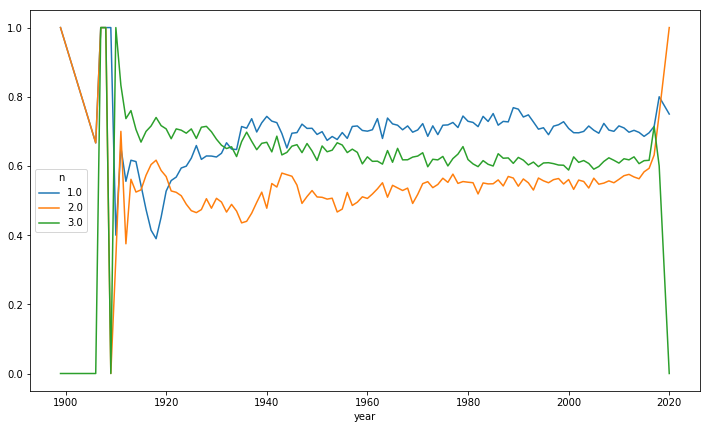

In [51]:
# plot male ratios ffor each cast rank across the years.
pctsbyN.actor.plot(figsize=(12,7))